In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [97]:
# Load Zomato dataset
zomato_data_url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/zomato/zomato.csv"
zomato_df = pd.read_csv(zomato_data_url, encoding='ISO-8859-1')

In [98]:
file_path = 'zomato_data.xlsx'
zomato_df.to_excel(file_path, index=False)

In [99]:
# Load the Excel file by specifying the engine
country_code_url = "https://github.com/nethajinirmal13/Training-datasets/blob/main/zomato/Country-Code.xlsx?raw=true"
country_df = pd.read_excel(country_code_url, engine='openpyxl')

In [100]:
file_path = 'country_data.xlsx'
country_df.to_excel(file_path, index=False)

In [101]:
zomato_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [102]:
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [103]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [104]:
country_df['Country'].unique()

array(['India', 'Australia', 'Brazil', 'Canada', 'Indonesia',
       'New Zealand', 'Phillipines', 'Qatar', 'Singapore', 'South Africa',
       'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype=object)

In [105]:
country_df.columns

Index(['Country Code', 'Country'], dtype='object')

In [106]:
# Merge the datasets
zomato_df = zomato_df.merge(country_df, on='Country Code', how='left')

In [107]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [108]:
zomato_df['Cuisines'].fillna('Not Available', inplace=True)

In [109]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [110]:
#replacing istanbul
zomato_df['City'] = zomato_df['City'].replace("å¿stanbul", "Istanbul")
zomato_df['Address'] = zomato_df['Address'].replace("å¿stanbul", "Istanbul", regex=True)
zomato_df['Locality Verbose'] = zomato_df['Locality Verbose'].replace("å¿stanbul", "Istanbul", regex=True)

In [111]:
def clean_text(text):
    # Normalize unicode characters (e.g., remove accents)
    text = unicodedata.normalize('NFKD', text)
    # Remove unwanted characters (keeping only letters and spaces)
    text = ''.join(c for c in text if c.isalpha() or c.isspace())
    # Normalize whitespace
    text = ' '.join(text.split())
    # Convert to lowercase
    text = text.lower()
    return text

In [112]:
#applying clen_text to column whether column to be cleaned
zomato_df['City'] = zomato_df['City'].apply(clean_text)
zomato_df['Locality'] = zomato_df['Locality'].apply(clean_text)
zomato_df['Locality Verbose'] = zomato_df['Locality Verbose'].apply(clean_text)
zomato_df['Restaurant Name'] = zomato_df['Restaurant Name'].apply(clean_text)
zomato_df['Address'] = zomato_df['Address'].apply(clean_text)

In [113]:
zomato_df['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [114]:
zomato_df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(å°\x88)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [115]:
zomato_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,le petit souffle,162,makati city,third floor century city mall kalayaan avenue ...,century city mall poblacion makati city,century city mall poblacion makati city makati...,121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,izakaya kikufuji,162,makati city,little tokyo chino roces avenue legaspi villag...,little tokyo legaspi village makati city,little tokyo legaspi village makati city makat...,121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,heat edsa shangrila,162,mandaluyong city,edsa shangrila garden way ortigas mandaluyong ...,edsa shangrila ortigas mandaluyong city,edsa shangrila ortigas mandaluyong city mandal...,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [116]:
#Capturing all data expect restaurant name is empty
zomato_df_cleaned = zomato_df[zomato_df['Restaurant Name'].str.strip() != '']

In [117]:
#drop the columns 
zomato_df_cleaned.drop(columns=['Longitude'],inplace=True)
zomato_df_cleaned.drop(columns=['Latitude'],inplace=True)
zomato_df_cleaned.drop(columns=['Restaurant ID'],inplace=True)
zomato_df_cleaned.drop(columns=['Country Code'],inplace=True)

In [118]:
#checking outliers
float_data_cols = [var for var in zomato_df_cleaned.columns if zomato_df_cleaned[var].dtype == 'float64']
float_data_cols

['Aggregate rating']

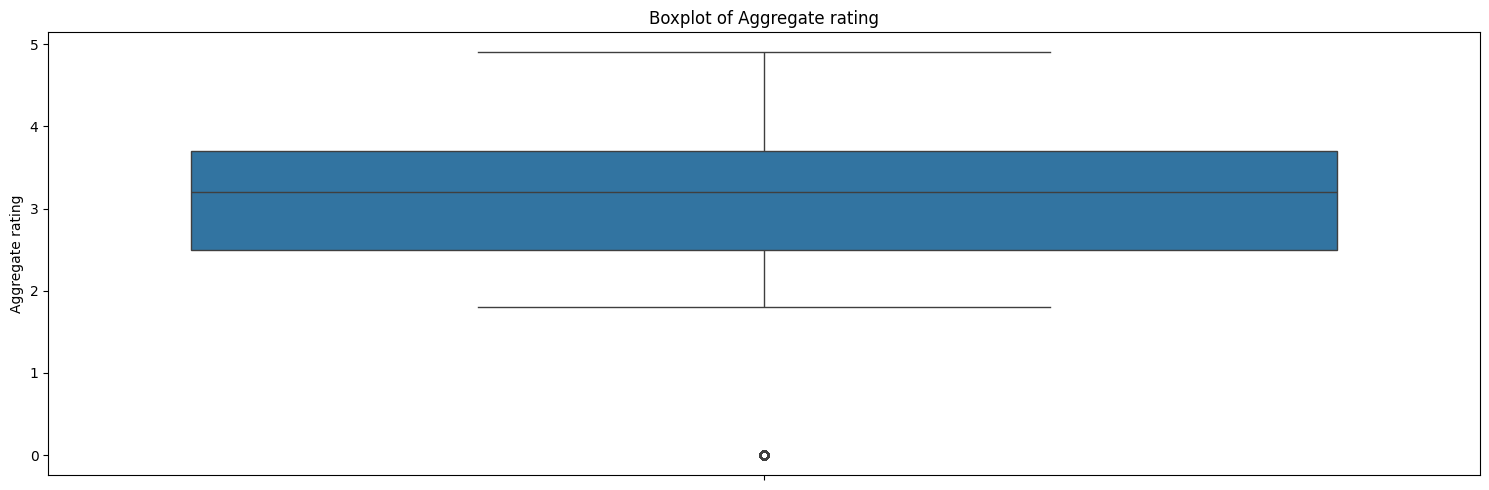

In [122]:
columns_of_interest = ['Aggregate rating']  # List of columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

# If there's only one column, axes will not be a list, so we need to handle it
if len(columns_of_interest) == 1:
    axes = [axes]  # Convert axes to a list for consistency

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=zomato_df_cleaned[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [124]:
def find_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip values within the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        outliers[column] = (lower_bound, upper_bound)
    return outliers

# Example usage:
outliers = find_outliers(zomato_df_cleaned, ['Aggregate rating'])
print(outliers)

{'Aggregate rating': (np.float64(0.6999999999999997), np.float64(5.5))}


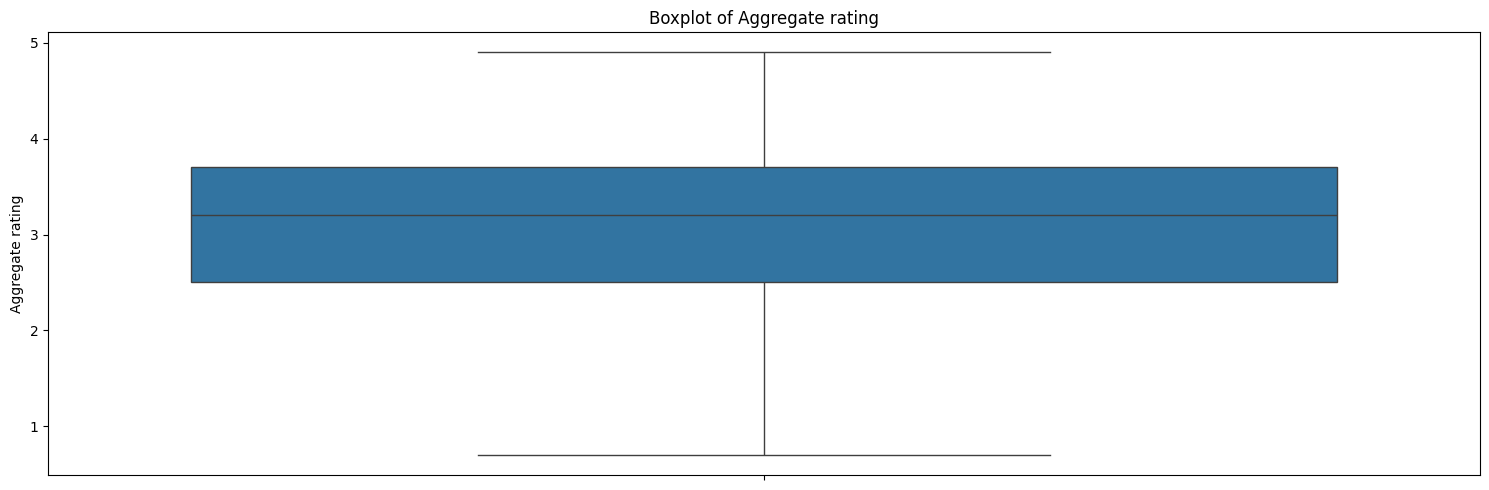

In [125]:
columns_of_interest = ['Aggregate rating']  # List of columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

# If there's only one column, axes will not be a list, so we need to handle it
if len(columns_of_interest) == 1:
    axes = [axes]  # Convert axes to a list for consistency

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=zomato_df_cleaned[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [126]:
integer_data_cols = [var for var in zomato_df_cleaned.columns if zomato_df_cleaned[var].dtype == 'int64']
integer_data_cols

['Average Cost for two', 'Price range', 'Votes']

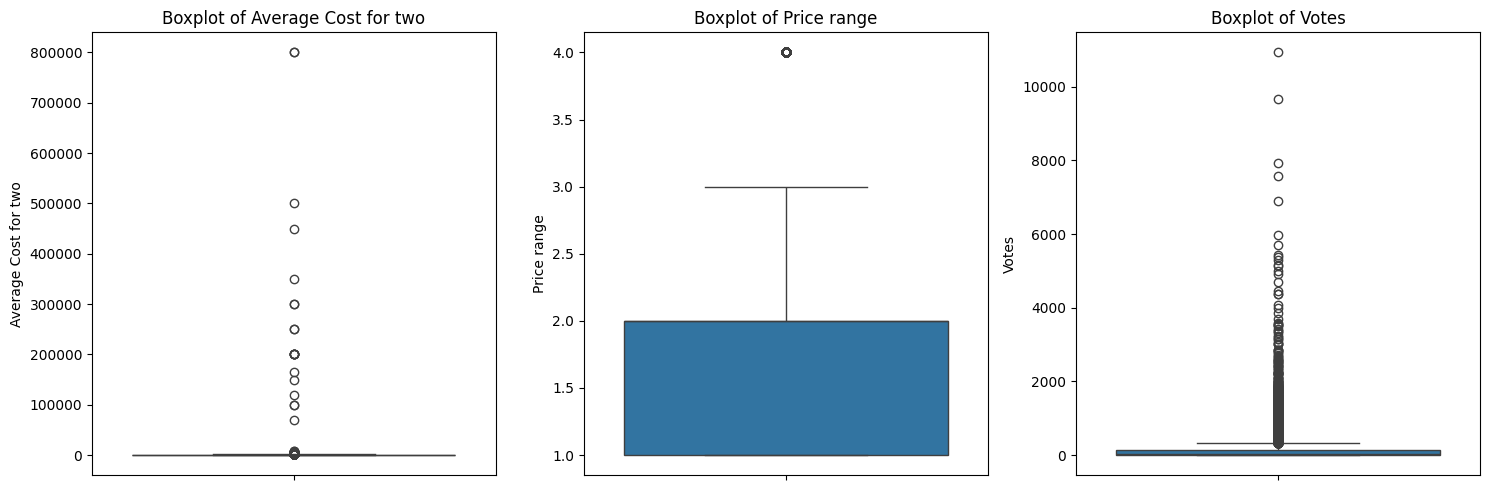

In [127]:
columns_of_interest = ['Average Cost for two',
 'Price range',
 'Votes']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=zomato_df_cleaned[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [128]:
outliers = find_outliers(zomato_df_cleaned,[
 'Average Cost for two',
 'Price range',
 'Votes'])
print(outliers)

{'Average Cost for two': (np.float64(-425.0), np.float64(1375.0)), 'Price range': (np.float64(-0.5), np.float64(3.5)), 'Votes': (np.float64(-184.0), np.float64(320.0))}


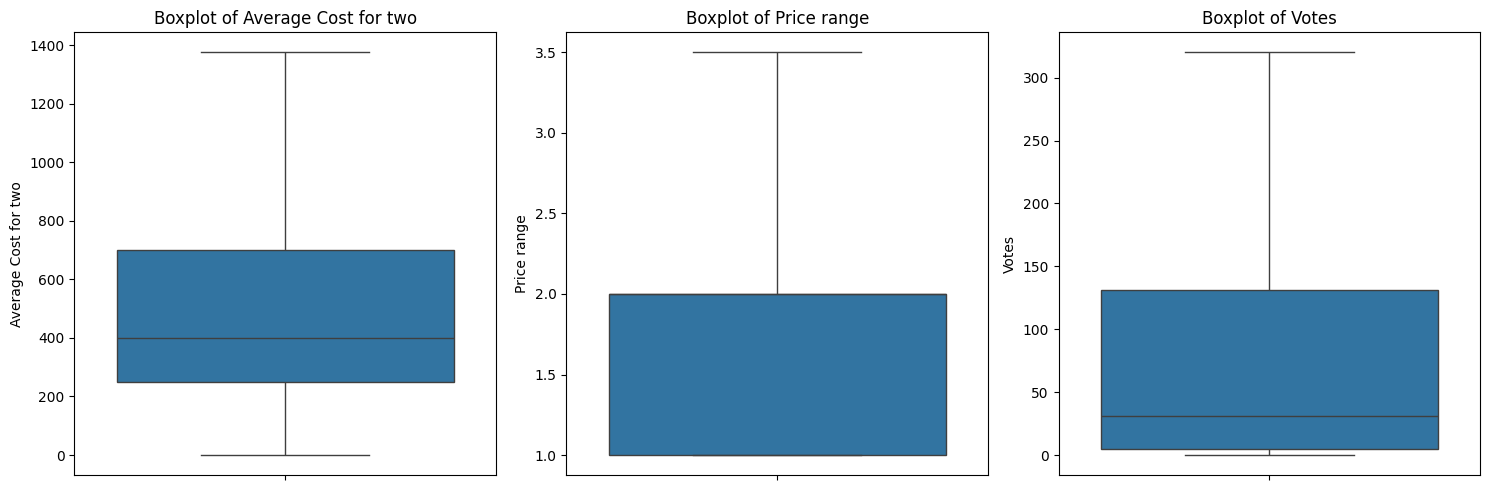

In [129]:
columns_of_interest = [
 'Average Cost for two',
 'Price range',
 'Votes']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=zomato_df_cleaned[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [130]:
# Conversion currency to INR
exchange_rates = {
    'Phillipines': 1.5,      # PHP to INR
    'Brazil': 15.0,          # BRL to INR
    'United States': 82.0,   # USD to INR
    'Australia': 50.0,       # AUD to INR
    'Canada': 60.0,          # CAD to INR
    'Singapore': 55.0,       # SGD to INR
    'UAE': 22.0,             # AED to INR
    'India': 1.0,            # INR (No conversion needed)
    'Indonesia': 0.0055,     # IDR to INR
    'New Zealand': 48.0,     # NZD to INR
    'United Kingdom': 100.0, # GBP to INR
    'Qatar': 22.5,           # QAR to INR
    'South Africa': 4.5,     # ZAR to INR
    'Sri Lanka': 0.25,       # LKR to INR
    'Turkey': 7.0            # TRY to INR
}

# Adding a new column for price in INR
zomato_df_cleaned['Price_INR'] = zomato_df_cleaned.apply(
    lambda x: x['Average Cost for two'] * exchange_rates.get(x['Country'], 1), axis=1
)


In [131]:
zomato_df_cleaned.head(2)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Price_INR
0,le petit souffle,makati city,third floor century city mall kalayaan avenue ...,century city mall poblacion makati city,century city mall poblacion makati city makati...,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314,Phillipines,1650.0
1,izakaya kikufuji,makati city,little tokyo chino roces avenue legaspi villag...,little tokyo legaspi village makati city,little tokyo legaspi village makati city makat...,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,320,Phillipines,1800.0


In [132]:
zomato_df1=zomato_df_cleaned
file_path = 'zomato_updated.xlsx'
zomato_df1.to_excel(file_path, index=False)

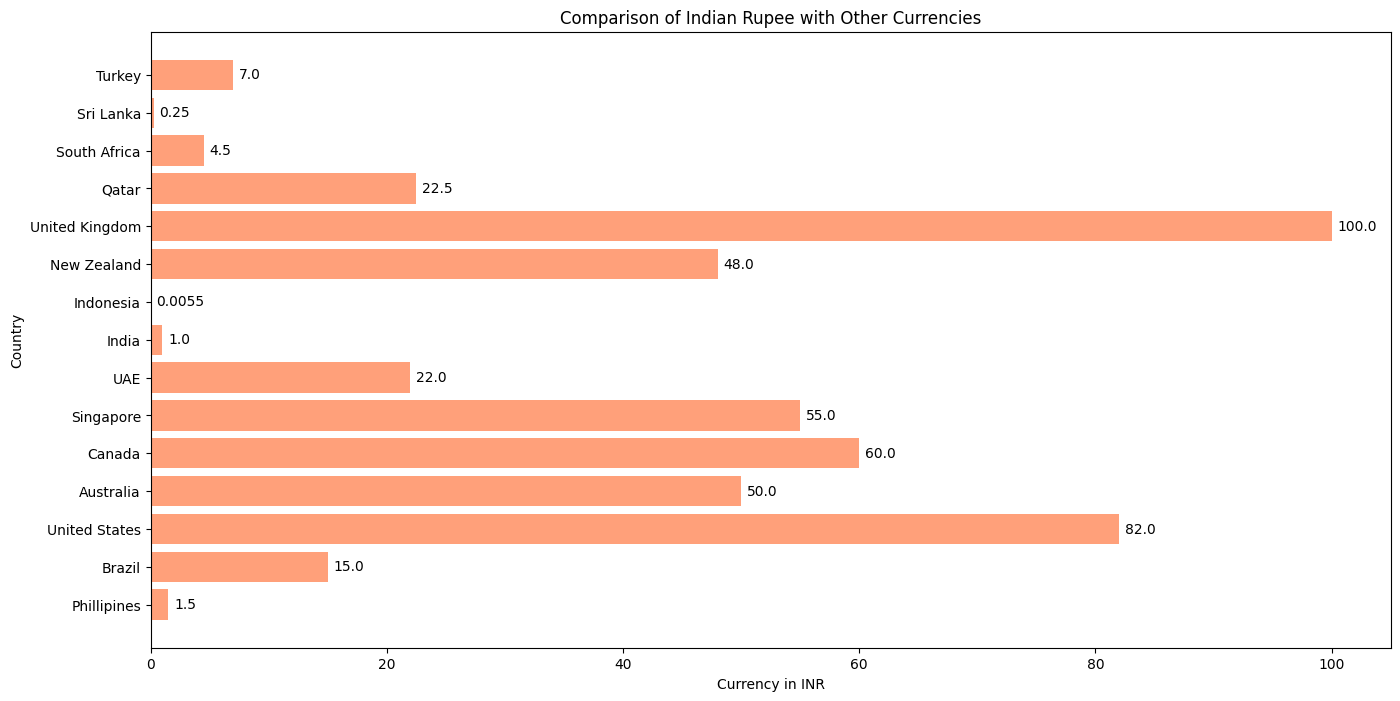

In [133]:
# Data for plotting
currencies = list(exchange_rates.keys())
rates = list(exchange_rates.values())

# Plotting exchange rates comparison
plt.figure(figsize=(16, 8)) 
bars = plt.barh(currencies, rates, color='lightsalmon')

# Adding value labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

plt.title('Comparison of Indian Rupee with Other Currencies')
plt.xlabel('Currency in INR')
plt.ylabel('Country')
plt.show()

In [134]:
zomato_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9549 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9549 non-null   object 
 1   City                  9549 non-null   object 
 2   Address               9549 non-null   object 
 3   Locality              9549 non-null   object 
 4   Locality Verbose      9549 non-null   object 
 5   Cuisines              9549 non-null   object 
 6   Average Cost for two  9549 non-null   int64  
 7   Currency              9549 non-null   object 
 8   Has Table booking     9549 non-null   object 
 9   Has Online delivery   9549 non-null   object 
 10  Is delivering now     9549 non-null   object 
 11  Switch to order menu  9549 non-null   object 
 12  Price range           9549 non-null   float64
 13  Aggregate rating      9549 non-null   float64
 14  Rating color          9549 non-null   object 
 15  Rating text           9549

In [135]:
# Check rows where Cuisines is 'Not Available'
zomato_df_cleaned[zomato_df_cleaned['Cuisines'] == 'Not Available'].head()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Price_INR
84,cookie shoppe,albany,n jackson st albany ga,albany,albany albany,Not Available,0,Dollar($),No,No,No,No,1.0,3.4,Orange,Average,34,United States,0.0
87,pearlys famous country cookng,albany,n slappey blvd albany ga,albany,albany albany,Not Available,0,Dollar($),No,No,No,No,1.0,3.4,Orange,Average,36,United States,0.0
94,jimmies hot dogs,albany,s jackson st albany ga,albany,albany albany,Not Available,10,Dollar($),No,No,No,No,1.0,3.9,Yellow,Good,160,United States,820.0
297,corkscrew cafe,gainesville,w main st dahlonega ga,dahlonega,dahlonega gainesville,Not Available,40,Dollar($),No,No,No,No,3.0,3.9,Yellow,Good,209,United States,3280.0
328,dovetail,macon,cherry st macon ga,macon,macon macon,Not Available,40,Dollar($),No,No,No,No,3.0,3.8,Yellow,Good,102,United States,3280.0
